<a href="https://colab.research.google.com/github/radhasolanki4143/web-development/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("Movies India.csv", encoding="latin1")
df.head()


,movie_Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
# Remove rows with missing ratings
df = df.dropna(subset=["Rating", "Genre", "Year"])

# Convert Year to numeric
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

df.isnull().sum()


,0
movie_Name,0
Year,0
Duration,1997
Genre,0
Rating,0
Votes,0
Director,5
Actor 1,110
Actor 2,176
Actor 3,259


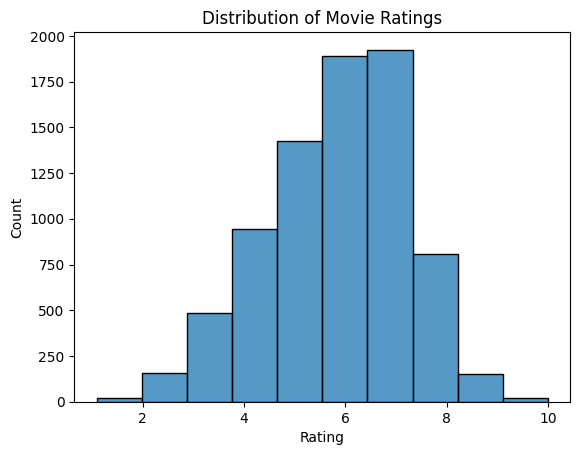

In [ ]:
plt.figure()
sns.histplot(df["Rating"], bins=10)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


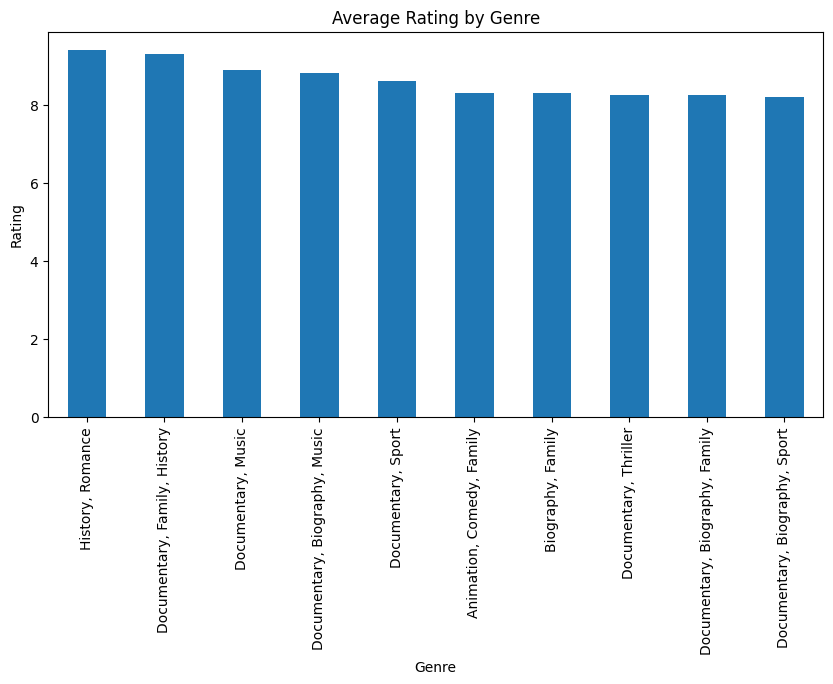

In [ ]:
plt.figure(figsize=(10,5))
df.groupby("Genre")["Rating"].mean().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Average Rating by Genre")
plt.ylabel("Rating")
plt.show()


In [ ]:
X = df[["Genre", "Year"]]
y = df["Rating"]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [("genre", OneHotEncoder(handle_unknown="ignore"), ["Genre"])],
    remainder="passthrough"
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('genre',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre'])])),
                ('regressor', LinearRegression())])

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred = model.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE (manual)
rmse = np.sqrt(mse)

# R2 Score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 1.2668685022680468
R2 Score: 0.11313134326804164


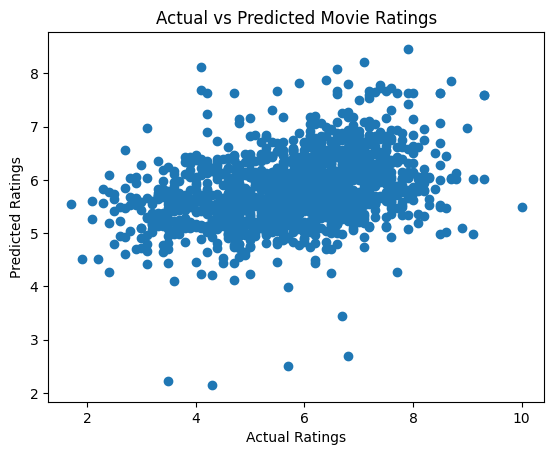

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.show()


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest model
rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=100,
        random_state=42
    ))
])

# Train
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Metrics (NO squared argument)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R2 Score:", rf_r2)


Random Forest RMSE: 1.3006838045965543
Random Forest R2 Score: 0.06515481653314759


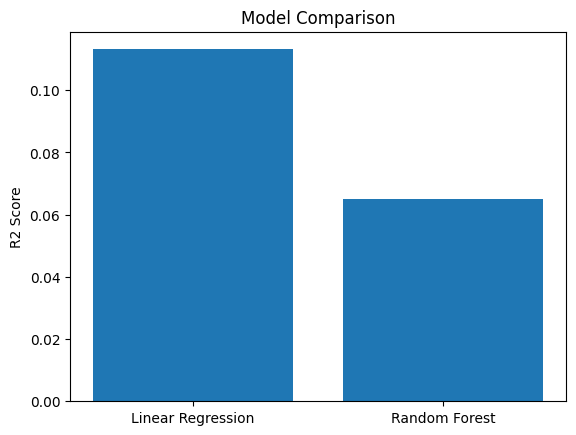

In [ ]:
models = ["Linear Regression", "Random Forest"]
scores = [r2, rf_r2]

plt.figure()
plt.bar(models, scores)
plt.ylabel("R2 Score")
plt.title("Model Comparison")
plt.show()


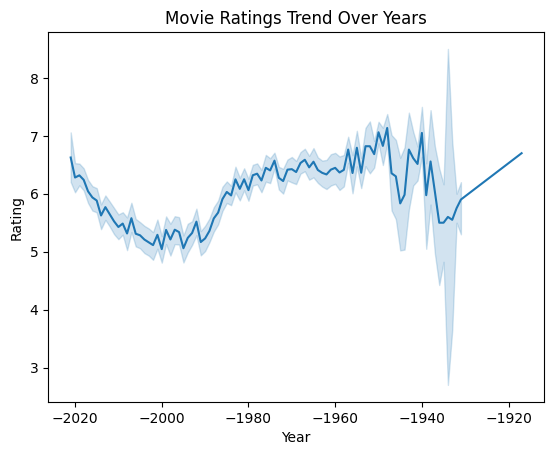

In [ ]:
plt.figure()
sns.lineplot(x=df["Year"], y=df["Rating"])
plt.title("Movie Ratings Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()


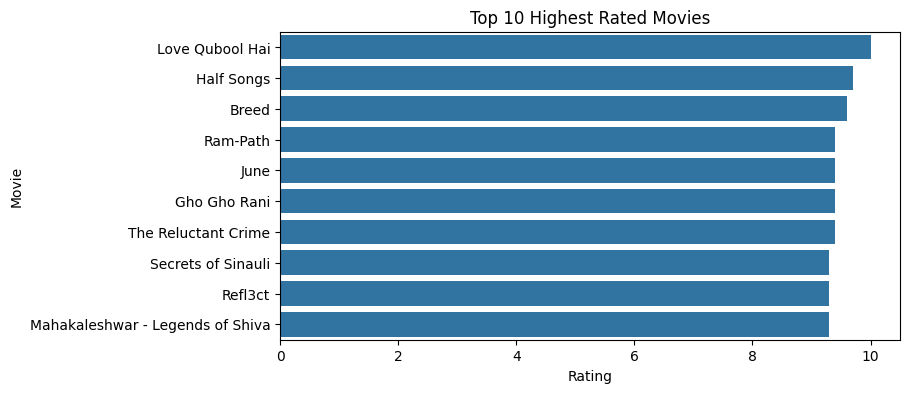

In [ ]:
top_movies = df.sort_values(by="Rating", ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(y=top_movies["movie_Name"], x=top_movies["Rating"])
plt.title("Top 10 Highest Rated Movies")
plt.xlabel("Rating")
plt.ylabel("Movie")
plt.show()
